In [1]:
import numpy as np
from fastplotlib import GridPlot, Scatter

RFBOutputContext()

/home/kushalk/repos/fastplotlib/fastplotlib/subplot.py:130: UserWarning: `center_graphic()` not yet implemented for `PerspectiveCamera`
  warn("`center_graphic()` not yet implemented for `PerspectiveCamera`")
/home/kushalk/repos/fastplotlib/fastplotlib/subplot.py:144: UserWarning: `center_scene()` not yet implemented for `PerspectiveCamera`
  warn("`center_scene()` not yet implemented for `PerspectiveCamera`")



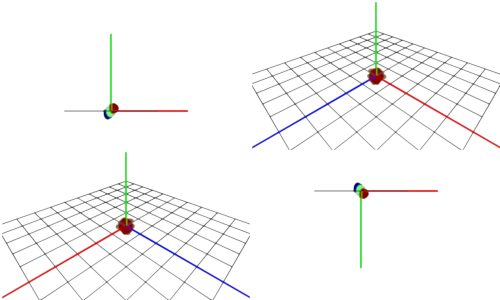

JupyterWgpuCanvas()

In [2]:
# grid with 2 rows and 2 columns
shape = (2, 2)

# define the views, some 2d and some 3d
cameras = [
    ['2d', '3d'], 
    ['3d', '2d']
]

# pan-zoom controllers for each view
# views are synced if they have the 
# same controller ID
controllers = [
    [0, 1],
    [1, 0]
]

# create the grid plot
grid_plot = GridPlot(
    shape=shape,
    cameras=cameras,
    controllers=controllers
)

# create a random distribution of 100 xyz coordinates
dims = (1000, 3)

offset = 3

normal = np.random.normal(size=dims)
cloud = np.vstack(
    [
        normal - offset,
        normal,
        normal + offset,
    ]
)

# colors with a numerical mapping for each offset
colors = np.array(([0] * 1000) + ([1] * 1000) + ([2] * 1000))

for subplot in grid_plot:
    scatter = Scatter(data=cloud, colors=colors, cmap='jet', alpha=0.7, size=5)
    subplot.add_graphic(scatter)
    
    subplot.set_axes_visibility(True)
    subplot.set_grid_visibility(True)

# different perspectives on the synced views
grid_plot[1, 0].camera.scale.x = -1
grid_plot[1, 1].camera.scale.y = -1

grid_plot.show()